# -*- coding: utf-8 -*-
"""
#Created on 2nd march

@author: Kuldeep
"""
# Load Libraries

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
#import graphviz
import warnings
warnings.filterwarnings("ignore")

Import the dataset

In [3]:
df = pd.read_csv("Skyserver.csv")

Have a look into data

In [4]:
print("\n Have a look into records", df.head(10))


 Have a look into records           objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   
5  1.237650e+18  183.847174  0.173694  19.43133  18.46779  18.16451  18.01475   
6  1.237650e+18  183.864379  0.019201  19.38322  17.88995  17.10537  16.66393   
7  1.237650e+18  183.900081  0.187473  18.97993  17.84496  17.38022  17.20673   
8  1.237650e+18  183.924588  0.097246  17.90616  16.97172  16.67541  16.53776   
9  1.237650e+18  183.973498  0.081626  18.67249  17.71375  17.49362  17.28284   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \


column and data type

In [5]:
print("\n Column and Data Type", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB

 Column and Data Type None


shape of data type

In [6]:
print("\n Shape of Dataset", df.shape)


 Shape of Dataset (10000, 18)


stats of dataset

In [7]:
print("\n Describe the Data ", df.describe())


 Describe the Data                objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.2031

validate class is having only two attribute

In [8]:
print("\n Unique value in Class ", df["class"].unique())


 Unique value in Class  ['STAR' 'GALAXY' 'QSO']


Class distribution for e and p

In [9]:
print("\n Count of the class ", df['class'].value_counts())


 Count of the class  GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [10]:
nan_in_df = df.isnull().values.sum()

Print the dataframe for NAN

In [11]:
print("Null value in input column",nan_in_df)

Null value in input column 0


In [12]:
print("Null in feature column",df['class'].isnull().values.sum())

Null in feature column 0


class distribution

In [13]:
print(df.groupby('class').size())

class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64


Unimodal Data Visualizations

In [19]:
#histograms()
#df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
#pyplot.show()

Here we create a dictionary which will map Class to numeric form and then replace it. Star will become 1 and so on.

In [20]:
dictionary={'STAR':1,'GALAXY':2,'QSO':3}
df.replace({'class':dictionary},inplace=True)
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,2,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512


In [21]:
array = df.values
#Y = array['class']
#X=array.drop(['class'],axis = 1)
Y = df['class']
X=df.drop(['class'],axis = 1)

use LabelEncoder here also
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.class distribution

# Validation Dataset

In [22]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

Test options and evaluation metric

In [23]:
num_folds = 10
seed = 7
scoring = 'accuracy'

Spot-Check Algorithms

In [24]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [25]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.414750 (0.016824)
LDA: 0.919250 (0.010296)
KNN: 0.773625 (0.014963)
CART: 0.983875 (0.004346)
NB: 0.797000 (0.012314)
SVM: 0.797250 (0.012296)


Compare Algorithms

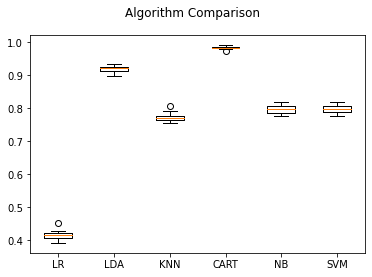

In [26]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Evaluate Algorithms: Standardize/Normalize data

to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines<br>
that standardize the data and build the # model for each fold in the cross-validation test harness.<br>
That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

Standardize the dataset

In [27]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

ScaledLR: 0.976750 (0.005624)
ScaledLDA: 0.910500 (0.011541)
ScaledKNN: 0.906125 (0.010023)
ScaledCART: 0.984250 (0.004409)
ScaledNB: 0.945625 (0.012045)
ScaledSVM: 0.953750 (0.007984)


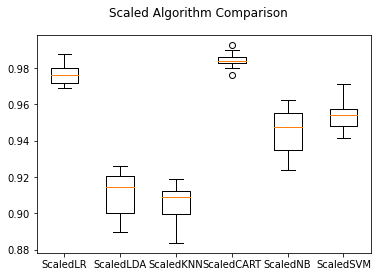

In [28]:
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

After investigate tuning the parameters for two algorithms that show promise from<br>
In the spot-checking highest score is for  

Tuning KNN

Tune scaled KNN

In [29]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.907875 using {'n_neighbors': 3}
0.902875 (0.016687) with: {'n_neighbors': 1}
0.907875 (0.011055) with: {'n_neighbors': 3}
0.906375 (0.010177) with: {'n_neighbors': 5}
0.903000 (0.010756) with: {'n_neighbors': 7}
0.899875 (0.011060) with: {'n_neighbors': 9}
0.898125 (0.012428) with: {'n_neighbors': 11}
0.896375 (0.011367) with: {'n_neighbors': 13}
0.895500 (0.012577) with: {'n_neighbors': 15}
0.894250 (0.011702) with: {'n_neighbors': 17}
0.891875 (0.012263) with: {'n_neighbors': 19}
0.889500 (0.012750) with: {'n_neighbors': 21}


Output after tunning of KNN

Tuning SVM

Tune scaled SVM

In [30]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  
    
# #########Ensemble Methods###########

Best: 0.987750 using {'C': 2.0, 'kernel': 'linear'}
0.974125 (0.003493) with: {'C': 0.1, 'kernel': 'linear'}
0.881625 (0.014642) with: {'C': 0.1, 'kernel': 'poly'}
0.893000 (0.014374) with: {'C': 0.1, 'kernel': 'rbf'}
0.848500 (0.013084) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.980125 (0.004453) with: {'C': 0.3, 'kernel': 'linear'}
0.902000 (0.012018) with: {'C': 0.3, 'kernel': 'poly'}
0.917625 (0.011187) with: {'C': 0.3, 'kernel': 'rbf'}
0.820125 (0.016483) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.982375 (0.004791) with: {'C': 0.5, 'kernel': 'linear'}
0.913125 (0.010771) with: {'C': 0.5, 'kernel': 'poly'}
0.930625 (0.010281) with: {'C': 0.5, 'kernel': 'rbf'}
0.811000 (0.018369) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.983750 (0.004183) with: {'C': 0.7, 'kernel': 'linear'}
0.917875 (0.011512) with: {'C': 0.7, 'kernel': 'poly'}
0.941375 (0.008704) with: {'C': 0.7, 'kernel': 'rbf'}
0.807250 (0.018378) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.984375 (0.004977) with: {'C': 0.9, 'kernel': 'line

evaluate four different ensemble machine learning<br>
algorithms, two boosting and two bagging methods:<br>
1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).<br>
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).

ensembles

In [31]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Output is

AB: 0.680625 (0.181888)
GBM: 0.990250 (0.002947)
RF: 0.989625 (0.003625)
ET: 0.982250 (0.003437)


Finalize model<br>
SVM showed the most promise as a low complexity and stable model for this problem. In<br>
so Finalize the model by training it on the entire training dataset and make<br>
predictions for the hold-out validation dataset to confirm

prepare the model

In [32]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.965
[[817  17   0]
 [ 35 947   5]
 [  1  12 166]]
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       834
           2       0.97      0.96      0.96       987
           3       0.97      0.93      0.95       179

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000

